In [1]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Define the image size and number of classes
img_size = 128
num_classes = 2

# Define the paths for the dataset
train_path = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
test_path = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test'
val_path = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'

In [3]:
# Load the training data
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='sparse')

# Load the testing data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='sparse')

# Load the validation data
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='sparse')


Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


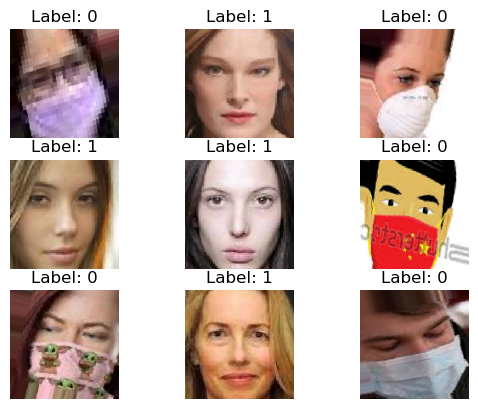

In [4]:
# Load some images from the training data
x, y = train_generator.next()
for i in range(0, 9):
    image = x[i]
    label = y[i]
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title('Label: ' + str(int(label)))
    plt.axis('off')
plt.show()

In [5]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [6]:
# Compile the model
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
# Fit the model on the training data
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
313/313 [==============================] - 59s 163ms/step - loss: 0.1294 - accuracy: 0.9517 - val_loss: 0.0563 - val_accuracy: 0.9800
Epoch 2/10
313/313 [==============================] - 23s 72ms/step - loss: 0.0424 - accuracy: 0.9854 - val_loss: 0.0185 - val_accuracy: 0.9925
Epoch 3/10
313/313 [==============================] - 23s 73ms/step - loss: 0.0353 - accuracy: 0.9882 - val_loss: 0.0176 - val_accuracy: 0.9912
Epoch 4/10
313/313 [==============================] - 23s 73ms/step - loss: 0.0397 - accuracy: 0.9871 - val_loss: 0.0110 - val_accuracy: 0.9962
Epoch 5/10
313/313 [==============================] - 22s 71ms/step - loss: 0.0251 - accuracy: 0.9911 - val_loss: 0.0254 - val_accuracy: 0.9875
Epoch 6/10
313/313 [==============================] - 23s 72ms/step - loss: 0.0348 - accuracy: 0.9879 - val_loss: 0.0115 - val_accuracy: 0.9950
Epoch 7/10
313/313 [==============================] - 23s 73ms/step - loss: 0.0203 - accuracy: 0.9930 - val_loss: 0.0073 - val_accuracy

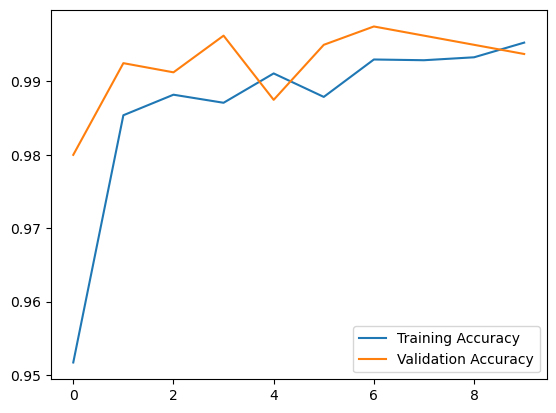

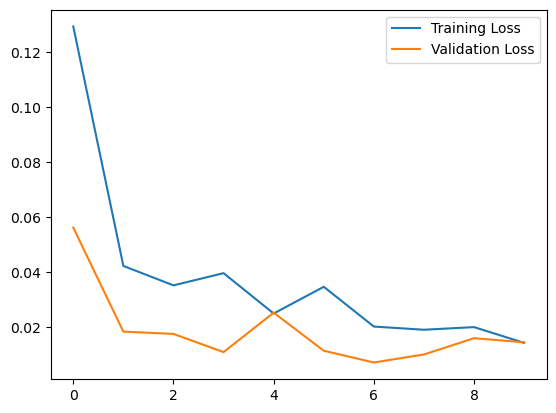

In [8]:
# Visualize the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
# Visualize the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [9]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

31/31 [==============================] - 5s 158ms/step - loss: 0.0216 - accuracy: 0.9940
Test accuracy: 0.9939516186714172
